# Exploratory Data Analysis, S.A. and w2v on Google Play Store App Data!
In this kernel we will be doing eda, sentiment analysis and w2v for data from google play store apps.
Let's start with importing needful modules and libraries.

# 1. Imports 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# data vizualization 
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
%matplotlib inline
plt.style.use('seaborn-white')

# S.A. and w2v ;)
import re
import collections
# import gensim
import nltk
from nltk.corpus import stopwords

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input\data.csv
../input\googleplaystore.csv
../input\googleplaystore_user_reviews.csv
../input\test.csv
../input\train.csv


In [2]:
# reading csv files
data = pd.read_csv('../input/googleplaystore.csv')
user_reviews = pd.read_csv('../input/googleplaystore_user_reviews.csv')

# 2. Data Exploration

In [3]:
data.shape

(10841, 13)

In [4]:
user_reviews.shape

(64295, 5)

In [5]:
user_reviews.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [6]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [8]:
data.describe()

Rating       Reviews
count  9367.000000  1.084100e+04
mean      4.191513  4.441119e+05
std       0.515735  2.927629e+06
min       1.000000  0.000000e+00
25%       4.000000  3.800000e+01
50%       4.300000  2.094000e+03
75%       4.500000  5.476800e+04
max       5.000000  7.815831e+07

# 3. Data Cleaning and Preprocessing

In [9]:
data.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [10]:
user_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [11]:
#calculating the RATING based on mean value
data['Rating'].fillna((data['Rating'].mean()), inplace=True)

In [12]:
data.isna().sum()

App               0
Category          1
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [13]:
#droping the rest of na values
data = data.dropna()

In [14]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [15]:
#final data shape
data.shape

(10829, 13)

In [16]:
#check for the duplicated data based on the column APP name
data[data.duplicated(['App'])]

App       Category  Rating  Reviews  \
229          Quick PDF Scanner + OCR FREE       BUSINESS     4.2    80805   
236                                   Box       BUSINESS     4.2   159872   
239                    Google My Business       BUSINESS     4.4    70991   
256                   ZOOM Cloud Meetings       BUSINESS     4.4    31614   
261             join.me - Simple Meetings       BUSINESS     4.0     6989   
...                                   ...            ...     ...      ...   
10715                  FarmersOnly Dating         DATING     3.0     1145   
10720  Firefox Focus: The privacy browser  COMMUNICATION     4.4    36981   
10730                         FP Notebook        MEDICAL     4.5      410   
10753      Slickdeals: Coupons & Shopping       SHOPPING     4.5    33599   
10768                                AAFP        MEDICAL     3.8       63   

                     Size     Installs  Type Price Content Rating  \
229    Varies with device   5,000,000+  Free     0       Everyone   
236    Varies with device  10,000,000+  Free     0       Everyone   
239    Varies with device   5,000,000+  Free     0       Everyone   
256                   37M  10,000,000+  Free     0       Everyone   
261    Varies with device   1,000,000+  Free     0       Everyone   
...                   ...          ...   ...   ...            ...   
10715                1.4M     100,000+  Free     0     Mature 17+   
10720                4.0M   1,000,000+  Free     0       Everyone   
10730                 60M      50,000+  Free     0       Everyone   
10753                 12M   1,000,000+  Free     0       Everyone   
10768                 24M      10,000+  Free     0       Everyone   

              Genres       Last Updated         Current Ver  \
229         Business  February 26, 2018  Varies with device   
236         Business      July 31, 2018  Varies with device   
239         Business      July 24, 2018    2.19.0.204537701   
256         Business      July 20, 2018      4.1.28165.0716   
261         Business      July 16, 2018           4.3.0.508   
...              ...                ...                 ...   
10715         Dating  February 25, 2016                 2.2   
10720  Communication       July 6, 2018                 5.2   
10730        Medical     March 24, 2018           2.1.0.372   
10753       Shopping      July 30, 2018                 3.9   
10768        Medical      June 22, 2018               2.3.1   

              Android Ver  
229          4.0.3 and up  
236    Varies with device  
239            4.4 and up  
256            4.0 and up  
261            4.4 and up  
...                   ...  
10715          4.0 and up  
10720          5.0 and up  
10730          4.4 and up  
10753          4.4 and up  
10768          5.0 and up  

[1181 rows x 13 columns]

In [17]:
data[data['App']=="Quick PDF Scanner + OCR FREE"]

App  Category  Rating  Reviews  \
222  Quick PDF Scanner + OCR FREE  BUSINESS     4.2    80805   
229  Quick PDF Scanner + OCR FREE  BUSINESS     4.2    80805   
285  Quick PDF Scanner + OCR FREE  BUSINESS     4.2    80804   

                   Size    Installs  Type Price Content Rating    Genres  \
222  Varies with device  5,000,000+  Free     0       Everyone  Business   
229  Varies with device  5,000,000+  Free     0       Everyone  Business   
285  Varies with device  5,000,000+  Free     0       Everyone  Business   

          Last Updated         Current Ver   Android Ver  
222  February 26, 2018  Varies with device  4.0.3 and up  
229  February 26, 2018  Varies with device  4.0.3 and up  
285  February 26, 2018  Varies with device  4.0.3 and up

In [18]:
data.shape

(10829, 13)

In [19]:
data.sort_values(by=['Reviews'], inplace=True)

In [20]:
data.head()

App            Category    Rating  Reviews  \
7712        C.P. CERVANTES (TOBARRA)              SOCIAL  4.191513        0   
7380                    CI Staff App           LIFESTYLE  4.191513        0   
7382       1st Fed CI Mobile Banking             FINANCE  4.191513        0   
8882                 DT Technologies            SHOPPING  4.191513        0   
7384  All-night drugstore CI & Price  HEALTH_AND_FITNESS  4.191513        0   

      Size Installs  Type  Price Content Rating            Genres  \
7712  4.9M       5+  Free      0       Everyone            Social   
7380   10M      10+  Free      0       Everyone         Lifestyle   
7382   31M     500+  Free      0       Everyone           Finance   
8882  1.3M      10+  Free      0       Everyone          Shopping   
7384  5.1M      10+  Paid  $0.99       Everyone  Health & Fitness   

            Last Updated Current Ver   Android Ver  
7712       July 24, 2018         8.2  4.0.3 and up  
7380     October 4, 2017       1.0.7    4.1 and up  
7382  September 29, 2016  6.0.0.1775    4.1 and up  
8882        June 7, 2018         1.1    4.4 and up  
7384   November 27, 2017     3.0.2.0    1.6 and up

In [21]:
#Drop the duplicates based on the app names
data2 = data.drop_duplicates(keep='last',subset=['App'])

In [22]:
data2.shape

(9648, 13)

In [23]:
data2.head()

App            Category    Rating  Reviews  \
7712        C.P. CERVANTES (TOBARRA)              SOCIAL  4.191513        0   
7380                    CI Staff App           LIFESTYLE  4.191513        0   
7382       1st Fed CI Mobile Banking             FINANCE  4.191513        0   
8882                 DT Technologies            SHOPPING  4.191513        0   
7384  All-night drugstore CI & Price  HEALTH_AND_FITNESS  4.191513        0   

      Size Installs  Type  Price Content Rating            Genres  \
7712  4.9M       5+  Free      0       Everyone            Social   
7380   10M      10+  Free      0       Everyone         Lifestyle   
7382   31M     500+  Free      0       Everyone           Finance   
8882  1.3M      10+  Free      0       Everyone          Shopping   
7384  5.1M      10+  Paid  $0.99       Everyone  Health & Fitness   

            Last Updated Current Ver   Android Ver  
7712       July 24, 2018         8.2  4.0.3 and up  
7380     October 4, 2017       1.0.7    4.1 and up  
7382  September 29, 2016  6.0.0.1775    4.1 and up  
8882        June 7, 2018         1.1    4.4 and up  
7384   November 27, 2017     3.0.2.0    1.6 and up

In [24]:
#Converting the Installs number into float value and copying in a different column
data2['Installs_num'] = data2['Installs'].apply(lambda x: float(x.split("+")[0].replace(",","")))

In [25]:
#converting the price into float values
data2['Price_USD'] = data2['Price'].apply(lambda x: float(x.replace("$","")))

In [26]:
#Converting reviews count into int
data2['Reviews_count']= data['Reviews'].apply(lambda x: int(x))

In [27]:
data2.head()

App            Category    Rating  Reviews  \
7712        C.P. CERVANTES (TOBARRA)              SOCIAL  4.191513        0   
7380                    CI Staff App           LIFESTYLE  4.191513        0   
7382       1st Fed CI Mobile Banking             FINANCE  4.191513        0   
8882                 DT Technologies            SHOPPING  4.191513        0   
7384  All-night drugstore CI & Price  HEALTH_AND_FITNESS  4.191513        0   

      Size Installs  Type  Price Content Rating            Genres  \
7712  4.9M       5+  Free      0       Everyone            Social   
7380   10M      10+  Free      0       Everyone         Lifestyle   
7382   31M     500+  Free      0       Everyone           Finance   
8882  1.3M      10+  Free      0       Everyone          Shopping   
7384  5.1M      10+  Paid  $0.99       Everyone  Health & Fitness   

            Last Updated Current Ver   Android Ver  Installs_num  Price_USD  \
7712       July 24, 2018         8.2  4.0.3 and up           5.0       0.00   
7380     October 4, 2017       1.0.7    4.1 and up          10.0       0.00   
7382  September 29, 2016  6.0.0.1775    4.1 and up         500.0       0.00   
8882        June 7, 2018         1.1    4.4 and up          10.0       0.00   
7384   November 27, 2017     3.0.2.0    1.6 and up          10.0       0.99   

      Reviews_count  
7712              0  
7380              0  
7382              0  
8882              0  
7384              0

In [28]:
len(data2[data2.Size == "Varies with device"])

1227

In [29]:
data2['Size'].replace('Varies with device',np.nan,inplace=True)

In [30]:
data2.head()

App            Category    Rating  Reviews  \
7712        C.P. CERVANTES (TOBARRA)              SOCIAL  4.191513        0   
7380                    CI Staff App           LIFESTYLE  4.191513        0   
7382       1st Fed CI Mobile Banking             FINANCE  4.191513        0   
8882                 DT Technologies            SHOPPING  4.191513        0   
7384  All-night drugstore CI & Price  HEALTH_AND_FITNESS  4.191513        0   

      Size Installs  Type  Price Content Rating            Genres  \
7712  4.9M       5+  Free      0       Everyone            Social   
7380   10M      10+  Free      0       Everyone         Lifestyle   
7382   31M     500+  Free      0       Everyone           Finance   
8882  1.3M      10+  Free      0       Everyone          Shopping   
7384  5.1M      10+  Paid  $0.99       Everyone  Health & Fitness   

            Last Updated Current Ver   Android Ver  Installs_num  Price_USD  \
7712       July 24, 2018         8.2  4.0.3 and up           5.0       0.00   
7380     October 4, 2017       1.0.7    4.1 and up          10.0       0.00   
7382  September 29, 2016  6.0.0.1775    4.1 and up         500.0       0.00   
8882        June 7, 2018         1.1    4.4 and up          10.0       0.00   
7384   November 27, 2017     3.0.2.0    1.6 and up          10.0       0.99   

      Reviews_count  
7712              0  
7380              0  
7382              0  
8882              0  
7384              0

In [31]:
data2["Size"] = (data2["Size"].replace(r'[kM]+$', '', regex=True).astype(float) * data2["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(["k","M"], [10**3, 10**6]).astype(int))

In [32]:
data2.head()

App            Category    Rating  Reviews  \
7712        C.P. CERVANTES (TOBARRA)              SOCIAL  4.191513        0   
7380                    CI Staff App           LIFESTYLE  4.191513        0   
7382       1st Fed CI Mobile Banking             FINANCE  4.191513        0   
8882                 DT Technologies            SHOPPING  4.191513        0   
7384  All-night drugstore CI & Price  HEALTH_AND_FITNESS  4.191513        0   

            Size Installs  Type  Price Content Rating            Genres  \
7712   4900000.0       5+  Free      0       Everyone            Social   
7380  10000000.0      10+  Free      0       Everyone         Lifestyle   
7382  31000000.0     500+  Free      0       Everyone           Finance   
8882   1300000.0      10+  Free      0       Everyone          Shopping   
7384   5100000.0      10+  Paid  $0.99       Everyone  Health & Fitness   

            Last Updated Current Ver   Android Ver  Installs_num  Price_USD  \
7712       July 24, 2018         8.2  4.0.3 and up           5.0       0.00   
7380     October 4, 2017       1.0.7    4.1 and up          10.0       0.00   
7382  September 29, 2016  6.0.0.1775    4.1 and up         500.0       0.00   
8882        June 7, 2018         1.1    4.4 and up          10.0       0.00   
7384   November 27, 2017     3.0.2.0    1.6 and up          10.0       0.99   

      Reviews_count  
7712              0  
7380              0  
7382              0  
8882              0  
7384              0

In [33]:
data2["Android Ver"].replace('Varies with device',np.nan,inplace=True)

In [34]:
#finding out the minimum android version supported for the apps
data2['min_android_version'] = data2["Android Ver"].apply(lambda x: re.sub("[a-zA-Z]","", str(x)))

In [35]:
data2.head()

App            Category    Rating  Reviews  \
7712        C.P. CERVANTES (TOBARRA)              SOCIAL  4.191513        0   
7380                    CI Staff App           LIFESTYLE  4.191513        0   
7382       1st Fed CI Mobile Banking             FINANCE  4.191513        0   
8882                 DT Technologies            SHOPPING  4.191513        0   
7384  All-night drugstore CI & Price  HEALTH_AND_FITNESS  4.191513        0   

            Size Installs  Type  Price Content Rating            Genres  \
7712   4900000.0       5+  Free      0       Everyone            Social   
7380  10000000.0      10+  Free      0       Everyone         Lifestyle   
7382  31000000.0     500+  Free      0       Everyone           Finance   
8882   1300000.0      10+  Free      0       Everyone          Shopping   
7384   5100000.0      10+  Paid  $0.99       Everyone  Health & Fitness   

            Last Updated Current Ver   Android Ver  Installs_num  Price_USD  \
7712       July 24, 2018         8.2  4.0.3 and up           5.0       0.00   
7380     October 4, 2017       1.0.7    4.1 and up          10.0       0.00   
7382  September 29, 2016  6.0.0.1775    4.1 and up         500.0       0.00   
8882        June 7, 2018         1.1    4.4 and up          10.0       0.00   
7384   November 27, 2017     3.0.2.0    1.6 and up          10.0       0.99   

      Reviews_count min_android_version  
7712              0             4.0.3    
7380              0               4.1    
7382              0               4.1    
8882              0               4.4    
7384              0               1.6

In [36]:
data2['Rating'].describe()

count    9648.000000
mean        4.176091
std         0.494175
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [37]:
data2.isna().sum().sort_values(ascending = False)

Size                   1227
Android Ver             990
min_android_version       0
Price                     0
Category                  0
Rating                    0
Reviews                   0
Installs                  0
Type                      0
Content Rating            0
Reviews_count             0
Genres                    0
Last Updated              0
Current Ver               0
Installs_num              0
Price_USD                 0
App                       0
dtype: int64

In [38]:
data2['Size'].fillna((data2['Size'].mean()), inplace=True)

In [39]:
#Our final data frame with all the extra values removed
data3 = data2.drop(['Reviews','Installs','Price','Android Ver'],axis='columns')

In [40]:
data3.head()

App            Category    Rating  \
7712        C.P. CERVANTES (TOBARRA)              SOCIAL  4.191513   
7380                    CI Staff App           LIFESTYLE  4.191513   
7382       1st Fed CI Mobile Banking             FINANCE  4.191513   
8882                 DT Technologies            SHOPPING  4.191513   
7384  All-night drugstore CI & Price  HEALTH_AND_FITNESS  4.191513   

            Size  Type Content Rating            Genres        Last Updated  \
7712   4900000.0  Free       Everyone            Social       July 24, 2018   
7380  10000000.0  Free       Everyone         Lifestyle     October 4, 2017   
7382  31000000.0  Free       Everyone           Finance  September 29, 2016   
8882   1300000.0  Free       Everyone          Shopping        June 7, 2018   
7384   5100000.0  Paid       Everyone  Health & Fitness   November 27, 2017   

     Current Ver  Installs_num  Price_USD  Reviews_count min_android_version  
7712         8.2           5.0       0.00              0             4.0.3    
7380       1.0.7          10.0       0.00              0               4.1    
7382  6.0.0.1775         500.0       0.00              0               4.1    
8882         1.1          10.0       0.00              0               4.4    
7384     3.0.2.0          10.0       0.99              0               1.6

# 4. Data analysis

Text(0, 0.5, 'Count')

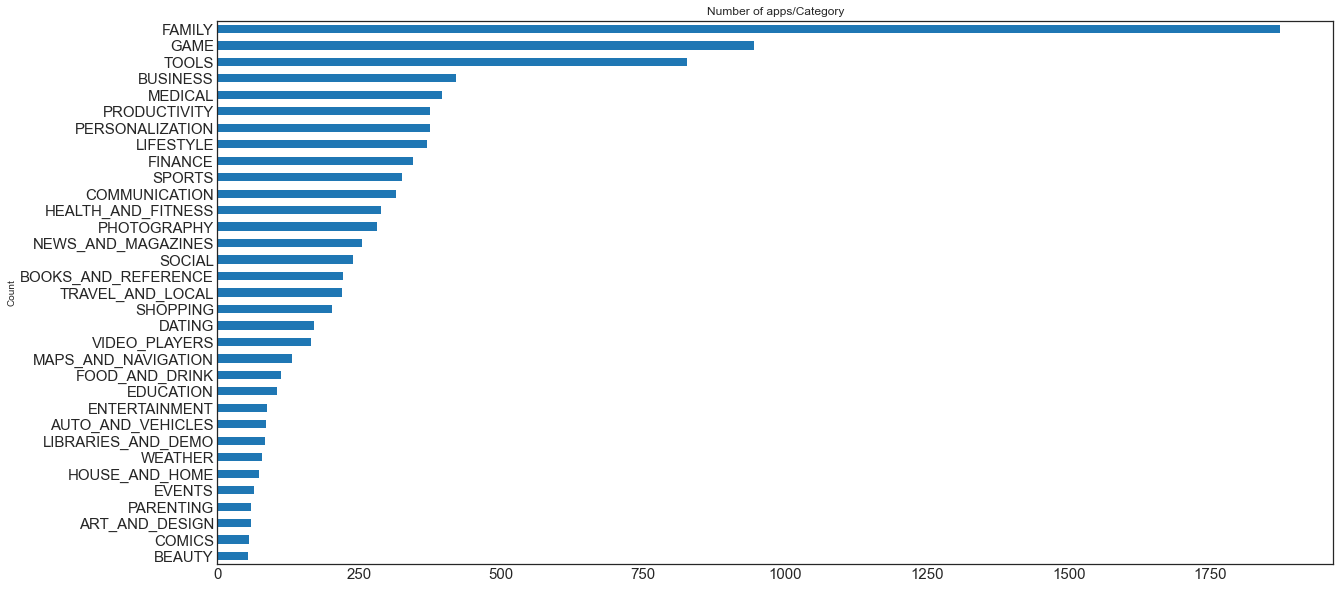

In [41]:
#Total Number of applications in each categories.

fig = plt.figure(figsize=(20,10)) 
data3.groupby('Category').count()["App"].sort_values(ascending=True).plot(kind='barh',title='Number of apps/Category', fontsize=15)
plt.ylabel('Count') 

#how to display %age on secondary axis on bar plot

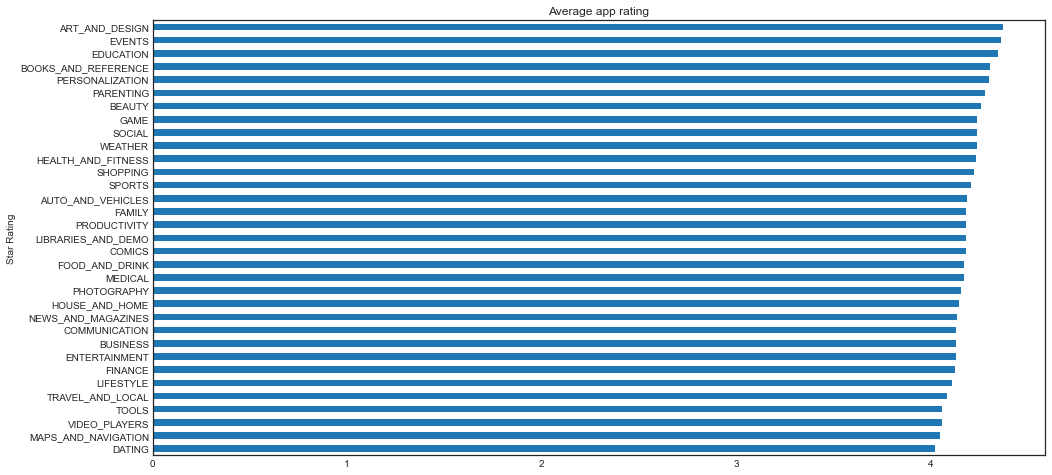

In [42]:
#What is the average rating of the applications in each categories?
fig = plt.figure(figsize=(16,8)) 
data3.groupby('Category').mean().sort_values(by='Rating',ascending='False')['Rating'].plot(kind='barh',title='Average app rating', fontsize=10)
plt.ylabel('Star Rating') 
plt.style.use('seaborn-white')

Text(0.5, 0, 'Average price - USD')

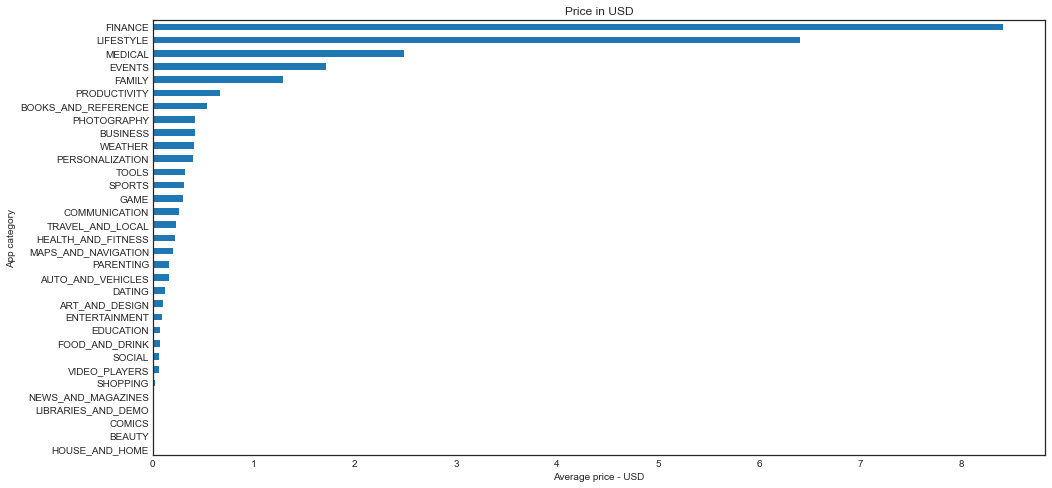

In [43]:
#What is the average price of applications in each categories?
fig = plt.figure(figsize=(16,8)) 
data3.groupby('Category').mean().sort_values(by='Price_USD',ascending='False')['Price_USD'].plot(kind='barh',title='Price in USD', fontsize=10)
plt.ylabel('App category') 
plt.xlabel('Average price - USD') 

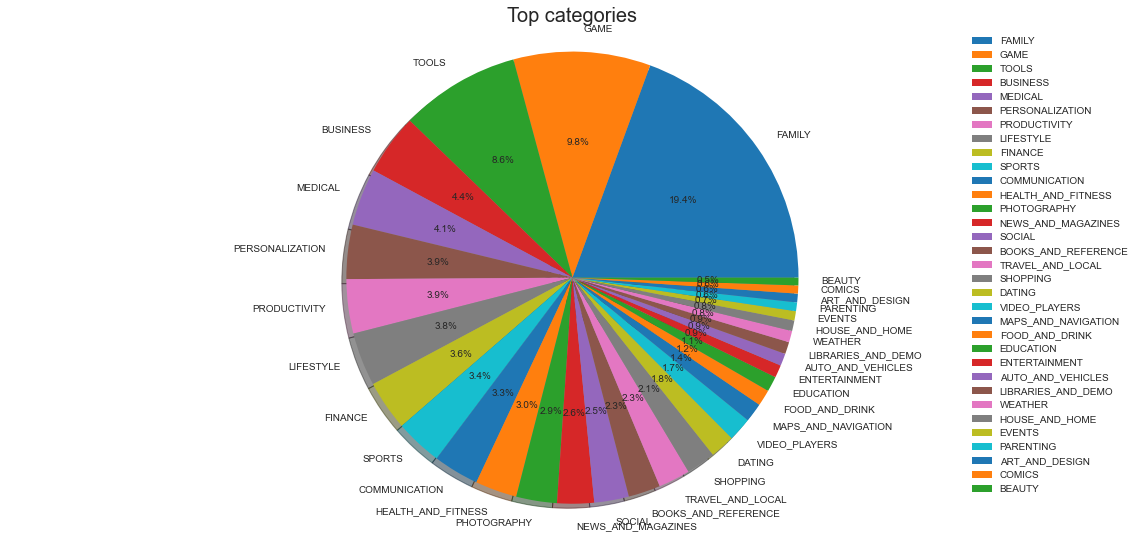

In [44]:
fig = plt.figure(figsize=(16,8)) 
labels = data3['Category'].value_counts(sort = True).index
sizes = data3['Category'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Top categories',size = 20)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [45]:
data3.head()

App            Category    Rating  \
7712        C.P. CERVANTES (TOBARRA)              SOCIAL  4.191513   
7380                    CI Staff App           LIFESTYLE  4.191513   
7382       1st Fed CI Mobile Banking             FINANCE  4.191513   
8882                 DT Technologies            SHOPPING  4.191513   
7384  All-night drugstore CI & Price  HEALTH_AND_FITNESS  4.191513   

            Size  Type Content Rating            Genres        Last Updated  \
7712   4900000.0  Free       Everyone            Social       July 24, 2018   
7380  10000000.0  Free       Everyone         Lifestyle     October 4, 2017   
7382  31000000.0  Free       Everyone           Finance  September 29, 2016   
8882   1300000.0  Free       Everyone          Shopping        June 7, 2018   
7384   5100000.0  Paid       Everyone  Health & Fitness   November 27, 2017   

     Current Ver  Installs_num  Price_USD  Reviews_count min_android_version  
7712         8.2           5.0       0.00              0             4.0.3    
7380       1.0.7          10.0       0.00              0               4.1    
7382  6.0.0.1775         500.0       0.00              0               4.1    
8882         1.1          10.0       0.00              0               4.4    
7384     3.0.2.0          10.0       0.99              0               1.6

In [46]:
#What are the applications and categories with, most number of reviews, highest rating, most revenue through installs, most number of installs?
#data3["Reviews_count"]==data3.Reviews_count.max()
print("Maximum number of reviews count is of : "+ data3[data3['Reviews_count']==data3.Reviews_count.max()]["App"].iloc[0] + " with a value of " + str(data3.Reviews_count.max()))
print("Maximum Rating is of : "+ data3[data3['Rating']==data3.Rating.max()]["App"].iloc[0] + " with a value of " + str(data3.Rating.max()))
print("Maximum number of installs is of : "+ data3[data3['Installs_num']==data3.Installs_num.max()]["App"].iloc[0] + " with a value of " + str(data3.Installs_num.max()))
print("Maximum price is of : "+ data3[data3['Price_USD']==data3.Price_USD.max()]["App"].iloc[0] + " with a value of " + str(data3.Price_USD.max()))

Maximum number of reviews count is of : Facebook with a value of 78158306
Maximum Rating is of : Food-Aw - Order Food Online in Aruba with a value of 5.0
Maximum number of installs is of : Google News with a value of 1000000000.0
Maximum price is of : I'm Rich - Trump Edition with a value of 400.0


In [47]:
#What is the average size of the applications?
print("Mean size " + str(data3["Size"].mean()/(1024*1024)) + " Mb") #converting in MB
print("Heaviest app size " + str(data3["Size"].max()/(1024*1024)) + " Mb") #converting in MB
print("Smalles app size " + str(data3["Size"].min()/(1024*1024)) + " Mb") #converting in MB

Mean size 19.47129246968008 Mb
Heaviest app size 95.367431640625 Mb
Smalles app size 0.008106231689453125 Mb


Text(0, 0.5, 'Number of Install')

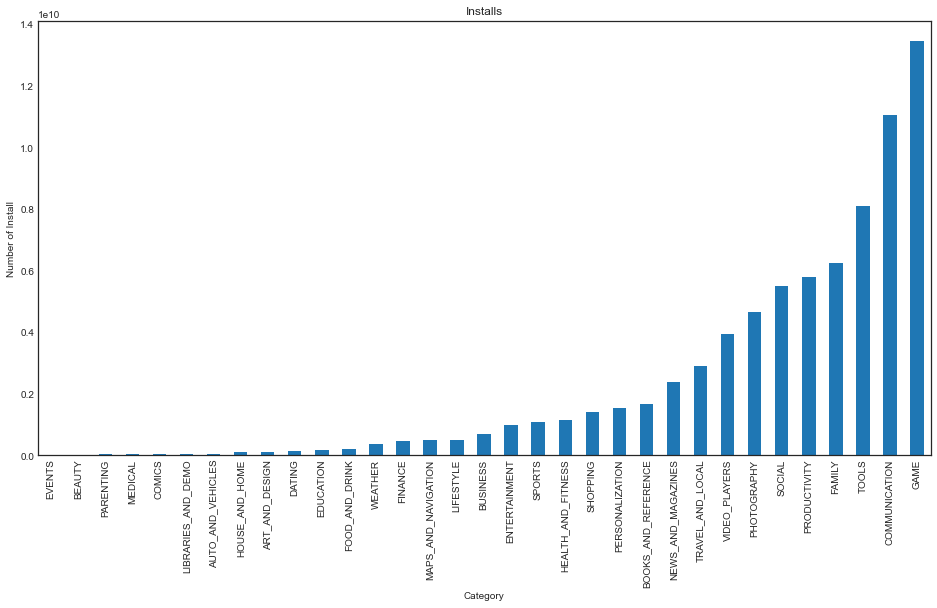

In [48]:
#What are the categories with, most number of reviews, highest rating, most revenue through installs, most number of installs?
fig = plt.figure(figsize=(16,8)) 
data3.groupby('Category').sum().sort_values(by='Installs_num',ascending='False')['Installs_num'].plot(kind='bar',title='Installs', fontsize=10)
plt.ylabel('Number of Install') 

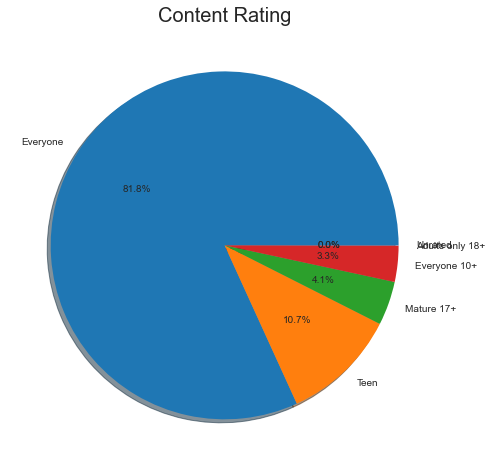

In [49]:
fig = plt.figure(figsize=(16,8)) 
labels = data3['Content Rating'].value_counts(sort = True).index
sizes = data3['Content Rating'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Content Rating',size = 20)
plt.show()

In [50]:
#added in version 16
data4= data3.copy()

In [51]:
#added in version 16
def is_free(price):
    if price > 0:
        return 1
    else:
        return 0

In [52]:
data3.isna().sum()

App                    0
Category               0
Rating                 0
Size                   0
Type                   0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Installs_num           0
Price_USD              0
Reviews_count          0
min_android_version    0
dtype: int64

In [53]:
data4["is_free"] = data4["Price_USD"].apply(lambda x: int(is_free(x)))

In [54]:
data4.head()

App            Category    Rating  \
7712        C.P. CERVANTES (TOBARRA)              SOCIAL  4.191513   
7380                    CI Staff App           LIFESTYLE  4.191513   
7382       1st Fed CI Mobile Banking             FINANCE  4.191513   
8882                 DT Technologies            SHOPPING  4.191513   
7384  All-night drugstore CI & Price  HEALTH_AND_FITNESS  4.191513   

            Size  Type Content Rating            Genres        Last Updated  \
7712   4900000.0  Free       Everyone            Social       July 24, 2018   
7380  10000000.0  Free       Everyone         Lifestyle     October 4, 2017   
7382  31000000.0  Free       Everyone           Finance  September 29, 2016   
8882   1300000.0  Free       Everyone          Shopping        June 7, 2018   
7384   5100000.0  Paid       Everyone  Health & Fitness   November 27, 2017   

     Current Ver  Installs_num  Price_USD  Reviews_count min_android_version  \
7712         8.2           5.0       0.00              0             4.0.3     
7380       1.0.7          10.0       0.00              0               4.1     
7382  6.0.0.1775         500.0       0.00              0               4.1     
8882         1.1          10.0       0.00              0               4.4     
7384     3.0.2.0          10.0       0.99              0               1.6     

      is_free  
7712        0  
7380        0  
7382        0  
8882        0  
7384        1

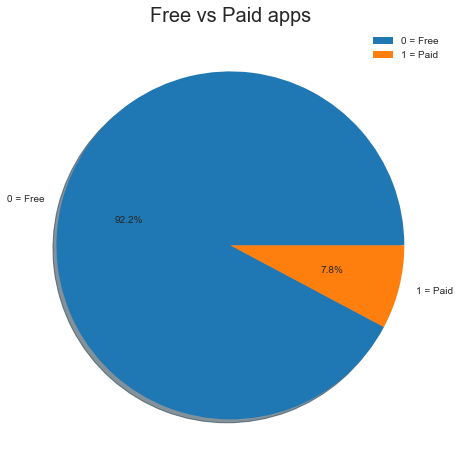

In [55]:
#How many percent of applications are free and how many are paid?
#to check how many apps are free
fig = plt.figure(figsize=(16,8)) 
labels = ['0 = Free','1 = Paid']
sizes = data4['is_free'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Free vs Paid apps',size = 20)
plt.legend()
plt.show()

No handles with labels found to put in legend.


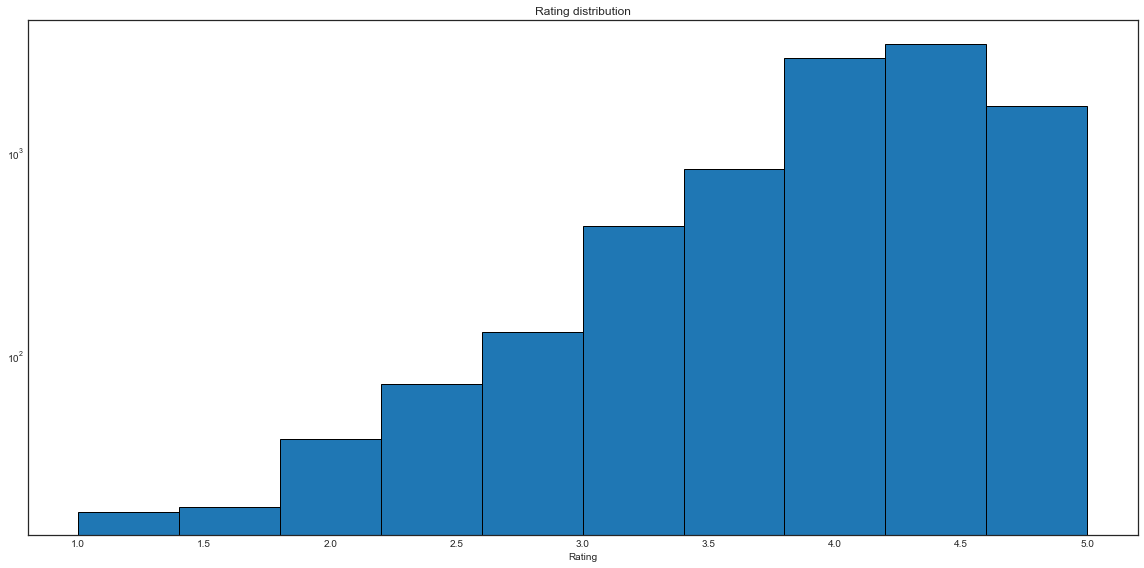

In [56]:
fig = plt.figure(figsize=(16,8)) 
plt.hist(data3['Rating'],edgecolor = 'black', log=True)
plt.title("Rating distribution")
plt.xlabel('Rating')
plt.tight_layout()
plt.legend()

No handles with labels found to put in legend.


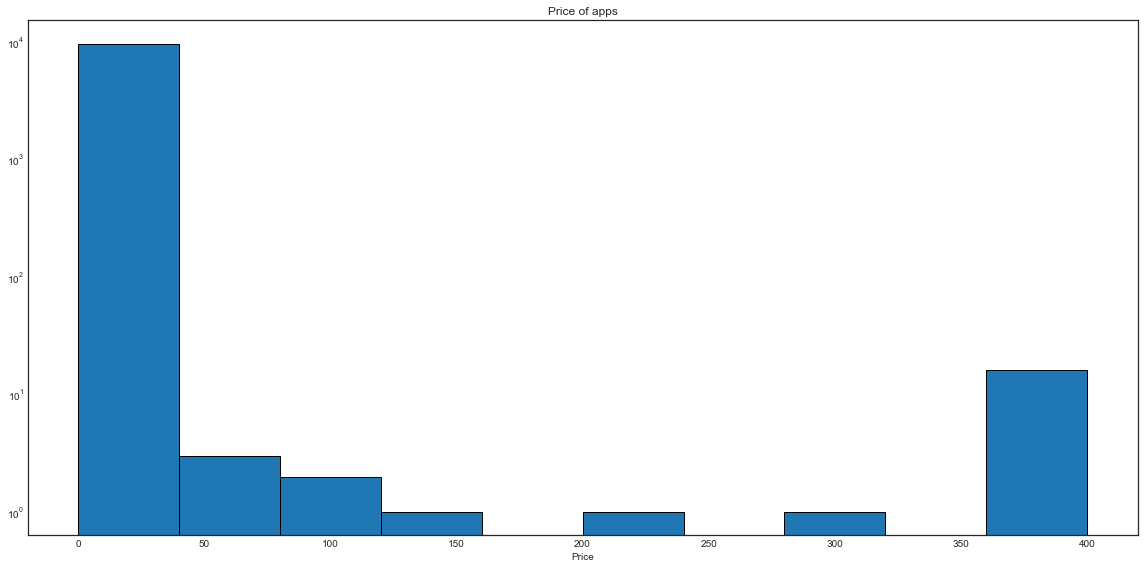

In [57]:
fig = plt.figure(figsize=(16,8)) 
plt.hist(data3['Price_USD'],edgecolor = 'black', log=True)
plt.title("Price of apps")
plt.xlabel('Price')
plt.tight_layout()
plt.legend()

# Observations

* Finance apps are the costliest one
* Games are the most installed category of the apps.
* Average rating is irrelevant to the category
* Around 19.7% of the apps are related to family
* 81.8% of the apps belong to everyone category

# Now S.A. and w2v 🤞🏻 on user-reviews data

In [58]:
user_reviews.head(10)

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   
6  10 Best Foods for You                                            Amazing   
7  10 Best Foods for You                                                NaN   
8  10 Best Foods for You                               Looking forward app,   
9  10 Best Foods for You              It helpful site ! It help foods get !   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000  
6  Positive                0.60                0.900000  
7       NaN                 NaN                     NaN  
8   Neutral                0.00                0.000000  
9   Neutral                0.00                0.000000

In [59]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [60]:
user_reviews.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

In [61]:
user_data = user_reviews.dropna()

In [62]:
user_data

App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
5               10 Best Foods for You   
...                               ...   
64222  Housing-Real Estate & Property   
64223  Housing-Real Estate & Property   
64226  Housing-Real Estate & Property   
64227  Housing-Real Estate & Property   
64230  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
5                                               Best way  Positive   
...                                                  ...       ...   
64222  Most ads older many agents ..not much owner po...  Positive   
64223  If photos posted portal load, fit purpose. I'm...  Positive   
64226  Dumb app, I wanted post property rent give opt...  Negative   
64227  I property business got link SMS happy perform...  Positive   
64230  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
3                0.400000                0.875000  
4                1.000000                0.300000  
5                1.000000                0.300000  
...                   ...                     ...  
64222            0.173333                0.486667  
64223            0.225000                0.447222  
64226           -0.287500                0.250000  
64227            0.800000                1.000000  
64230           -0.316667                0.400000  

[37427 rows x 5 columns]

In [63]:
temp = user_data.groupby('Sentiment').count()['Translated_Review'].reset_index().sort_values(by='Translated_Review',ascending=False)
temp.style.background_gradient(cmap='Purples')

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

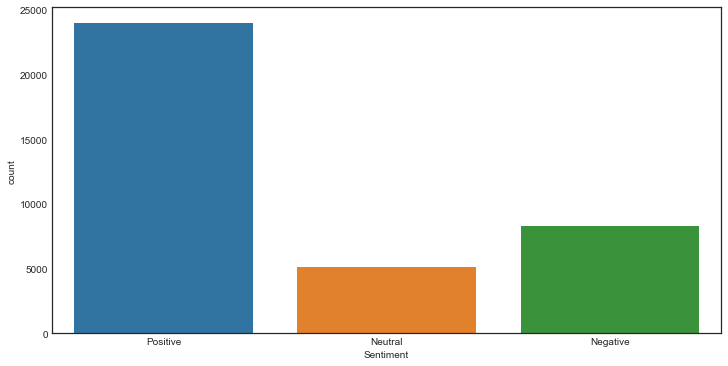

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=user_data)

In [65]:
fig = go.Figure(go.Funnelarea(
    text = temp.Sentiment,
    values = temp.Translated_Review,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

# Current knowings :
Data is very positive that means people's mood and actions are good towards the apps. But some of them could be wrong too, who knows? ;)

nltk.download('stopwords')
stop_words = stopwords.words("english")

split_words = []
top = []
for review in user_data.Translated_Review:
    top.append(review)

top

top = str(top)
reviews = str(user_data.Translated_Review)

wordcount = {}
for word in reviews.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stop_words:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(20)
temp = pd.DataFrame(lst, columns = ['Word', 'Count'])
temp.plot.bar(x='Word',y='Count')
temp.columns = ['Word','Count']
temp.style.background_gradient(cmap='Purples')

fig = px.bar(temp, x="Word", y="Count", title='Commmon Words in Selected Text', orientation='v', 
             width=700, height=700,color='Count')
fig.show()

w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

%%time
documents = [_text.split() for _text in user_data.Translated_Review] 

w2v_model.build_vocab(documents)

words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

%%time
w2v_model.train(documents, total_examples=len(documents), epochs=8)

w2v_model.most_similar("good")

w2v_model.most_similar("bad")

### For now, I didn't cleaned the data for w2v but you feel free to copy and edit my kernel and do so.

# Please upvote if found helpful and leave your valuable comment below.😊